Cancer Integration  with NCGA < https://portal.gdc.cancer.gov/

There is an API, however since we are only dealing with 31 GAIN domains / 32 receptors, I grabbed all data in JSON. https://docs.gdc.cancer.gov/

In [1]:
import json, glob
import sse_func
from gain_classes import *
jsons = glob.glob("gain_json/*.json")
print(len(jsons))
jsons

34


['gain_json/l3_gain.json',
 'gain_json/b1_gain.json',
 'gain_json/v1_gain.json',
 'gain_json/b2_gain.json',
 'gain_json/e3_gain.json',
 'gain_json/g4_gain.json',
 'gain_json/a3_gain.json',
 'gain_json/f2_gain.json',
 'gain_json/g6_gain.json',
 'gain_json/g2_gain.json',
 'gain_json/l4_gain.json',
 'gain_json/isoform4.json',
 'gain_json/g1_gain.json',
 'gain_json/b3_gain.json',
 'gain_json/f4_gain.json',
 'gain_json/e5_gain.json',
 'gain_json/c3_gain.json',
 'gain_json/notthislphn3_ISOFORM4gain.json',
 'gain_json/c2_gain.json',
 'gain_json/g7_gain.json',
 'gain_json/l1_gain.json',
 'gain_json/f5_gain.json',
 'gain_json/d2_gain.json',
 'gain_json/f1_gain.json',
 'gain_json/g5_gain.json',
 'gain_json/e1_gain.json',
 'gain_json/a2_gain.json',
 'gain_json/l2_gain.json',
 'gain_json/f3_gain.json',
 'gain_json/c1_gain.json',
 'gain_json/g3_gain.json',
 'gain_json/d1_gain.json',
 'gain_json/uncurated.d2_gain.json',
 'gain_json/e2_gain.json']

In [2]:
j = jsons[0]
with open(j) as j_open:
    j_data = j_open.read()
mutation_data = json.loads(j_data) # Will contain a list of dicts

The loaded JSON will contain a list of dictionaries, where every dictionary corresponds to a single mutation of the respective receptor. With the pre-defined window, we have a list of mutations, where the keys correspond to properties of respective mutations.

In [3]:
print(j.split("/")[-1].split(".")[0].upper(), "CANCER GENOME ATLAS MUTATIONS\n","_"*70)
positions = []
for mutation in mutation_data['mutations']:
    for key in mutation.keys():
        print(key.ljust(30), mutation[key])
    print("_"*70)
    resid = int(mutation["x"]) # X is the residue ID
    positions.append(resid)
def totext(f, stuff):
    with  open(f, 'a') as txt:
        txt.write(stuff)

print(len(positions))

L3_GAIN CANCER GENOME ATLAS MUTATIONS
 ______________________________________________________________________
id                             ae05d49f-6842-5513-9483-d768ab5ccf6e
y                              5
genomic_dna_change             chr4:g.62044487G>A
x                              1161
consequence                    missense
impact                         MODERATE
sift_impact                    deleterious
polyphen_impact                probably_damaging
sift_score                     0.02
polyphen_score                 0.994
aa_change                      R1161Q
______________________________________________________________________
id                             b358cd17-49f7-5e75-bc4a-58ecf7f69b51
y                              4
genomic_dna_change             chr4:g.61979759G>A
x                              920
consequence                    missense
impact                         MODERATE
sift_impact                    tolerated
polyphen_impact                possibly_da

In [4]:
print(sorted(positions))


[6, 15, 19, 22, 23, 31, 32, 43, 44, 46, 52, 54, 55, 57, 64, 66, 69, 70, 71, 74, 77, 84, 85, 87, 89, 91, 93, 94, 95, 100, 102, 107, 109, 112, 112, 121, 122, 123, 123, 125, 125, 132, 150, 151, 151, 153, 157, 157, 157, 161, 164, 171, 176, 178, 178, 181, 184, 186, 196, 204, 209, 210, 211, 212, 214, 217, 223, 224, 227, 228, 231, 232, 232, 234, 234, 234, 236, 238, 239, 250, 254, 254, 254, 256, 261, 262, 264, 264, 266, 266, 268, 271, 274, 278, 279, 279, 283, 286, 289, 296, 296, 298, 299, 303, 306, 308, 315, 318, 324, 325, 328, 329, 329, 331, 331, 332, 332, 333, 337, 338, 351, 358, 360, 364, 366, 367, 368, 373, 373, 379, 380, 381, 385, 385, 385, 392, 392, 393, 395, 397, 398, 399, 402, 405, 407, 408, 409, 410, 411, 414, 417, 417, 421, 422, 431, 432, 436, 440, 444, 446, 448, 451, 452, 454, 459, 461, 462, 462, 465, 467, 467, 469, 470, 471, 472, 473, 475, 479, 483, 487, 488, 490, 493, 494, 494, 495, 497, 501, 504, 505, 505, 508, 510, 512, 521, 523, 523, 537, 538, 545, 551, 560, 564, 567, 568, 574,

We need to construct a new dictionary where the indexing itself locates to. This can be a new attribute of the class
Let's construct the human collection first.

In [5]:
def filter_by_list(sequences, selection): # selection list
    new_list = []
    for seq_tup in sequences:
        for it in selection:
            if it in seq_tup[0]:
                new_list.append(seq_tup)
    return new_list

quality_file = "/home/hildilab/projects/agpcr_nom/app_gain_gain.mafft.jal"
alignment_file = "/home/hildilab/projects/agpcr_nom/app_gain_gain.mafft.fa"
stride_folder = "/home/hildilab/projects/agpcr_nom/all_gps_stride"
#stride_files = glob.glob("/home/hildilab/projects/agpcr_nom/all_gps_stride/*")
stride_files = glob.glob("/home/hildilab/projects/agpcr_nom/sigmas/sigma_2/*")
quality = sse_func.read_quality(quality_file)
gps_minus_one = 6781 # -1 of the ACTUAL COLUMN (6782) in JALVIEW since there is is ONE-INDEXED
aln_cutoff = 6826 # 
alignment_dict = sse_func.read_alignment(alignment_file, aln_cutoff)
valid_seqs = sse_func.read_multi_seq("/home/hildilab/projects/agpcr_nom/app_gain_gain.fa")
human_seqs = ["Q9HBW9","O60241","Q6QNK2","Q9UHX3","Q5T601","Q96PE1","O60242","Q86SQ4",
                "O94910","Q8IWK6","Q8IZP9","Q8WXG9","Q86Y34","O95490","Q14246","Q9BY15",
                "Q8IZF2","Q86SQ3","Q8IZF6","Q96K78","Q8IZF3","Q8IZF7","Q8IZF5","Q7Z7M1",
                "Q8IZF4","Q9HCU4","Q9NYQ6","Q9NYQ7","Q9HAR2","O14514","P48960",
                "Q9Y653"]
sigma_2_strides = glob.glob("/home/hildilab/projects/agpcr_nom/sigma_2*/*.stride")
list_32 = filter_by_list(valid_seqs, human_seqs)

human_collection = GainCollection( alignment_file = alignment_file,
                                        aln_cutoff = aln_cutoff,
                                        quality = quality,
                                        gps_index = gps_minus_one,
                                        stride_files =  sigma_2_strides, #stride_files,
                                        sequence_files=None,
                                        sequences=list_32,
                                        alignment_dict = alignment_dict,
                                        coil_weight=0.00, # won't work with altered boundary detection
                                        is_truncated = True,
                                        stride_outlier_mode = True
                                         )

 13%|█▎        | 4/31 [00:00<00:00, 37.77it/s]

[NOTE] GainCollection.__init__: Found sequences object.
self.sequence = array(['I', 'T', 'F', 'S', 'E', 'L', 'K', 'G', 'F', 'A', 'E', 'R', 'L',
       'Q', 'R', 'N', 'E', 'S', 'G', 'L', 'D', 'S', 'G', 'R', 'S', 'Q',
       'Q', 'L', 'A', 'L', 'L', 'L', 'R', 'N', 'A', 'T', 'Q', 'H', 'T',
       'A', 'G', 'Y', 'F', 'G', 'S', 'D', 'V', 'K', 'V', 'A', 'Y', 'Q',
       'L', 'A', 'T', 'R', 'L', 'L', 'A', 'H', 'E', 'S', 'T', 'Q', 'R',
       'G', 'F', 'G', 'L', 'S', 'A', 'T', 'Q', 'D', 'V', 'H', 'F', 'T',
       'E', 'N', 'L', 'L', 'R', 'V', 'G', 'S', 'A', 'L', 'L', 'D', 'T',
       'A', 'N', 'K', 'R', 'H', 'W', 'E', 'L', 'I', 'Q', 'Q', 'T', 'E',
       'G', 'G', 'T', 'A', 'W', 'L', 'L', 'Q', 'H', 'Y', 'E', 'A', 'Y',
       'A', 'S', 'A', 'L', 'A', 'Q', 'N', 'M', 'R', 'H', 'T', 'Y', 'L',
       'S', 'P', 'F', 'T', 'I', 'V', 'T', 'P', 'N', 'I', 'V', 'I', 'S',
       'V', 'V', 'R', 'L', 'D', 'K', 'G', 'N', 'F', 'A', 'G', 'A', 'K',
       'L', 'P', 'R', 'Y', 'E', 'A', 'L', 'R', 'G', 'E', 'Q', 'P

 45%|████▌     | 14/31 [00:00<00:00, 39.42it/s]

[ 509  510  581  614  615  616  652  653  662  673  685  700 1068 1094
 1096 1194 1386 1387 1388 1669 1702 1841 1842 1843 1850 1863 1869 1899
 1912 2006 2007 2008 2015 2016 2147 2165 2166 2196 2197 2261 2271 2364
 2383 2384 2404 2445 2446 2489 2490 2579 2580 2581 2582 2625 2626 2627
 2628 2629 2630 2631 2632 2633 2634 2635 2645 2646 2647 2648 2649 2650
 2651 2652 2659 2660 2661 2662 2691 2702 2727 2728 2730 2731 2732 2733
 2734 2735 2736 2737 2743 2799 2839 2847 2848 2876 2887 2905 2936 2955
 2982 2983 2985 3008 3010 3011 3031 3032 3040 3041 3052 3072 3073 3084
 3085 3086 3087 3112 3141 3142 3157 3158 3214 3215 3260 3284 3285 3286
 3287 3308 3309 3321 3322 3352 3353 3354 3356 3439 3440 3441 3442 3452
 3454 3455 3456 3461 3465 3466 3467 3476 3528 3541 3607 3724 3739 3751
 3752 3753 3754 3901 3902 3913 3914 3952 3970 3972 3973 3995 3996 3998
 4036 4037 4069 4070 4071 4082 4083 4092 4229 4230 4278 4279 4285 4295
 4307 4324 4329 4331 4368 4369 4405 4480 4494 4495 4521 4548 4744 4745
 4765 

 77%|███████▋  | 24/31 [00:00<00:00, 36.83it/s]

self.sequence = array(['E', 'N', 'L', 'E', 'T', 'L', 'E', 'K', 'Q', 'V', 'K', 'D', 'V',
       'T', 'A', 'P', 'L', 'N', 'N', 'I', 'S', 'S', 'E', 'V', 'Q', 'I',
       'L', 'T', 'S', 'D', 'A', 'N', 'K', 'L', 'T', 'A', 'E', 'N', 'I',
       'T', 'S', 'A', 'T', 'R', 'V', 'V', 'G', 'Q', 'I', 'F', 'N', 'T',
       'S', 'R', 'N', 'A', 'S', 'P', 'E', 'A', 'K', 'K', 'V', 'A', 'I',
       'V', 'T', 'V', 'S', 'Q', 'L', 'L', 'D', 'A', 'S', 'E', 'D', 'A',
       'F', 'Q', 'R', 'V', 'A', 'A', 'T', 'A', 'N', 'D', 'D', 'A', 'L',
       'T', 'T', 'L', 'I', 'E', 'Q', 'M', 'E', 'T', 'Y', 'S', 'L', 'S',
       'L', 'G', 'N', 'Q', 'S', 'V', 'V', 'E', 'P', 'N', 'I', 'A', 'I',
       'Q', 'S', 'A', 'N', 'F', 'S', 'S', 'E', 'N', 'A', 'V', 'G', 'P',
       'S', 'N', 'V', 'R', 'F', 'S', 'V', 'Q', 'K', 'G', 'A', 'S', 'S',
       'S', 'L', 'V', 'S', 'S', 'S', 'T', 'F', 'I', 'H', 'T', 'N', 'V',
       'D', 'G', 'L', 'N', 'P', 'D', 'A', 'Q', 'T', 'E', 'L', 'Q', 'V',
       'L', 'L', 'N', 'M', 'T', 'K', 'N', 'Y', '

100%|██████████| 31/31 [00:00<00:00, 40.06it/s]

self.sequence = array(['P', 'P', 'P', 'G', 'V', 'H', 'S', 'Q', 'T', 'L', 'S', 'R', 'F',
       'F', 'D', 'K', 'V', 'Q', 'D', 'L', 'G', 'R', 'D', 'S', 'K', 'T',
       'S', 'S', 'A', 'E', 'V', 'T', 'I', 'Q', 'N', 'V', 'I', 'K', 'L',
       'V', 'D', 'E', 'L', 'M', 'E', 'A', 'P', 'G', 'D', 'V', 'E', 'A',
       'L', 'A', 'P', 'P', 'V', 'R', 'H', 'L', 'I', 'A', 'T', 'Q', 'L',
       'L', 'S', 'N', 'L', 'E', 'D', 'I', 'M', 'R', 'I', 'L', 'A', 'K',
       'S', 'L', 'P', 'K', 'G', 'P', 'F', 'T', 'Y', 'I', 'S', 'P', 'S',
       'N', 'T', 'E', 'L', 'T', 'L', 'M', 'I', 'Q', 'E', 'R', 'G', 'D',
       'K', 'N', 'V', 'T', 'M', 'G', 'Q', 'S', 'S', 'A', 'R', 'M', 'K',
       'L', 'N', 'W', 'A', 'V', 'A', 'A', 'G', 'A', 'E', 'D', 'P', 'G',
       'P', 'A', 'V', 'A', 'G', 'I', 'L', 'S', 'I', 'Q', 'N', 'M', 'T',
       'T', 'L', 'L', 'A', 'N', 'A', 'S', 'L', 'N', 'L', 'H', 'S', 'K',
       'K', 'Q', 'A', 'E', 'L', 'E', 'E', 'I', 'Y', 'E', 'S', 'S', 'I',
       'R', 'G', 'V', 'Q', 'L', 'R', 'R', 'L', '

For each GAIN domain within this collection, map the mutations by residue on the corresponding element. Then, merge all that to construct a global mutation map.

In [6]:
# VALID DATA FROM THE MSA AND THE ANALYSIS PIPELINE
sdb = 3425
anchors = [ 662, 1194, 1912, 2490, 2848, 3011, 3073, 3260, 3455, 3607, 3998, 4279, 4850, 5339,
           5341, 5413, 5813, 6337, 6659, 6696, 6765, 6808]
anchor_occupation = [ 4594, 6539, 11392, 13658,  8862,  5092,  3228, 14189,  9413, 12760,
                      9420, 11201, 12283,  3676,  4562, 13992, 12575, 13999, 14051, 14353,
                      9760, 14215,]
anchor_dict = sse_func.make_anchor_dict(anchors, 3425)

gain_adresses = {}
named_dirs = []
for gain_idx, gain in enumerate(human_collection.collection):
    _,_, named_dir = gain.create_indexing(anchors, anchor_occupation, anchor_dict)
    named_dirs.append(named_dir)
    gain.idx_dir = named_dir
    gain.rev_idx_dir = {v: k for k, v in named_dir.items()}
    gain_adresses[gain_idx] = gain.name

breaks = [[[], [], [], [], [], [], [0, 18]], [[], [], [], [], [], [], [], [], [], [], [], [], [], []]]
[[], [], [], [], [], [], [0, 18]]
[NOTE] GainDomain.create_indexing : ANCHOR AMBIGUITY in this SSE:

	 sse_idx = 1194,

	 anchor_dict[sse_idx] = 'H2',
type_breaks = [[], [], [], [], [], [], [0, 18]] 	 idx = 0

	 type_breaks[idx] = []
[(array([ 0, 13]), ['H2.38', 'H2.39', 'H2.40', 'H2.41', 'H2.42', 'H2.43', 'H2.44', 'H2.45', 'H2.46', 'H2.47', 'H2.48', 'H2.49', 'H2.50', 'H2.51'], (array([ 0, 13]), 12, 'H2'))]
[NOTE] GainDomain.create_indexing : ANCHOR AMBIGUITY in this SSE:

	 sse_idx = 3073,

	 anchor_dict[sse_idx] = 'H7',
type_breaks = [[], [], [], [], [], [], [0, 18]] 	 idx = 5

	 type_breaks[idx] = []
[(array([ 90, 101]), ['H6.48', 'H6.49', 'H6.50', 'H6.51', 'H6.52', 'H6.53', 'H6.54', 'H6.55', 'H6.56', 'H6.57', 'H6.58', 'H6.59'], (array([ 90, 101]), 92, 'H6'))]
[[], [], [], [], [], [], [], [], [], [], [], [], [], []]
breaks = [[[], [], [], [1], [], [], [0, 18]], [[], [], [], [], [],

In [7]:
rev_named_dirs = []
for named_dir in named_dirs:
    rev_dir = {v: k for k, v in named_dir.items()}
    rev_named_dirs.append(rev_dir)

In [8]:
def retrieve_mutation_json(name,jsons):
    try: 
        identifier = name.split("AGR")[1][:2] # When its a normal aGPCR
    except: 
        identifier = "C"+name.split("CELR")[1][0]

    json_identifier = identifier.lower()
    json_file = [j for j in jsons if json_identifier in j.lower()]
    print(f"DEBUG : retrieve_mutation_json: {json_file = }" )
    if len(json_file) > 1 : print("WARNING: Multiple matching JSON Files detected:", json)
    with open(json_file[0]) as j_open:
        j_data = j_open.read()
    mutation_data = json.loads(j_data) # Will contain a list of dicts
    return mutation_data

Construct a Dictionary with info to all mutations at respective RESID. Also just make a list with the resids to summarize all entry occurences.

In [9]:
def extract_mutations(gain, jsons):
    gain_name = gain.name
    mut_data = retrieve_mutation_json(gain_name, jsons)
    gain_mutation_dict = {}
    positions = []
    for mutation in mut_data['mutations']:
        # The "x" key is the identifying position!
        resid = int(mutation["x"]) 
        #
        # Here, one can define criteria for skipping said mutation. For now, use all.
        #

        # Add the receptor name to the mutation dictionary
        mutation["receptor"] = gain_name

        if resid in gain_mutation_dict.keys():
            gain_mutation_dict[resid].append(mutation)
        else:
            gain_mutation_dict[resid] = [mutation]
        positions.append(resid)
    return positions, gain_mutation_dict

In [20]:
generalized_counts = {} # For every nomenclature label, the number of entries is denoted
generalized_mutations = {} # Here the individual mutation entries on indexing label are contained
invalid = 0
valid = 0
mismatch_flag = False
fasta_offsets = [2027, 2106, 2175, 479, 632, 588, 568, 528, 517, 579, 723, 2449, 
                 5619, 546, 0, 300, 22, 140, 112, 356, 154, 96, 365, 415, 265, 
                 170, 235, 120, 418, 269, 324]

total_within = 0
for gain_ndx, gain in enumerate(human_collection.collection):
    gain_valid = 0
    gain_invalid = 0
    fasta_offset = fasta_offsets[gain_ndx]
    # Retrieve mutations for respective receptor
    positions, gain_mutation_dict = extract_mutations(gain, jsons)
    #print(positions)
    #print("DEBUG: NAME", gain.name, "\nSTART\t\t", gain.start,"\nEND\t\t", gain.end, "\nFA.OFFSET\t", fasta_offset)
    # Find all mutations whose RESID (fasta) matches the corrected INTERVAL(for fasta resids)
    within = [pos for pos in positions if pos in range(fasta_offset, fasta_offset + 1 + gain.end - gain.start)]
    #print("DEBUG: Mutations within GAIN space\n", sorted(within))
    # Go through the gain_mutation_dict and add into the two dicts
    total_within += len(within)
    """print("EXTENT OF MUTATIONS IN TARGET RESIDUE INTERVAL:\nINTERVAL\t\t:",fasta_offset, fasta_offset + 1 + gain.end - gain.start,
        "\n FIRST OCC\t\t:",within[0], 
        "\n LAST OCC\t\t:",within[-1],
        "\n TOTAL MUT\t\t:",len(positions),
        "\n WITHIN INTERVAL\t:", len(within),
        "\n DEBUG: RESID WITHIN", within
        )"""
    
    # Evaluate the mutations. If the residue in question (corrected index) is named (i.e. "H6.50"), get its resepective label.
    #print("DEBUG:",gain.rev_idx_dir)
    #print(gain_mutation_dict.keys())
    for mutated_resid in gain_mutation_dict.keys():
        # Since fasta_offset maps to the first gain residue (i.e. 2027 with gain.start being 459), an offset needs to be set by the difference
        corrected_resid = mutated_resid - fasta_offset + gain.start -1
        # print("DEBUG:", mutated_resid, "-->", corrected_resid, end=' ')
        # map it to its corresponding label. If there is none, continue
        try:
            mutated_label = gain.rev_idx_dir[corrected_resid]
            #print(mutated_label)
            gain_valid +=1
            
        except KeyError:
            gain_invalid += 1
            continue
        
        # SANITY CHECK:
        if gain_mutation_dict[mutated_resid][0]['aa_change'][0] != gain.sequence[corrected_resid-gain.start]:
            print(f"MISMATCH! {mutated_resid} -> {corrected_resid}",
                 f"{gain_mutation_dict[mutated_resid][0]['aa_change'][0]} : {gain.sequence[corrected_resid-gain.start]} in GAIN",
                 f"{gain.sequence[corrected_resid-gain.start-2:corrected_resid-gain.start+3]}")
            mismatch_flag = True
        #else:
            #print(f"MATCH {mutated_resid} -> {corrected_resid} | {gain_mutation_dict[mutated_resid][0]['aa_change'][0]} : {gain.sequence[corrected_resid-gain.start]}")
        
        # with the Label, map into generalized dictionary
        if mutated_label not in generalized_mutations.keys():
            generalized_mutations[mutated_label] = gain_mutation_dict[mutated_resid]
        else:
            [generalized_mutations[mutated_label].append(mutation) for mutation in gain_mutation_dict[mutated_resid]]
    valid += gain_valid
    invalid += gain_invalid
    print("VALID MAPPED POSITIONS: ", gain_valid, "\nINVALID POSITIONS     : ", gain_invalid, "\nTOTAL POSITIONS       : ", len(gain_mutation_dict.keys()))
if mismatch_flag: print("[WARNING]: MISMATCHES HAVE BEEN FOUND. PLEASE CHECK THE OUTPUT.")
else: print("[NOTE]: NO MISMATCHES HAVE BEEN FOUND.")
print(f"TOTAL MUTATIONS WITHIN GAIN:", valid, "\nTOTAL MUTATIONS OUTSIDE GAIN:", invalid, "\nTOTAL MUTATIONS:", valid+invalid)

DEBUG : retrieve_mutation_json: json_file = ['gain_json/c2_gain.json']
VALID MAPPED POSITIONS:  25 
INVALID POSITIONS     :  345 
TOTAL POSITIONS       :  370
DEBUG : retrieve_mutation_json: json_file = ['gain_json/c1_gain.json']
VALID MAPPED POSITIONS:  23 
INVALID POSITIONS     :  358 
TOTAL POSITIONS       :  381
DEBUG : retrieve_mutation_json: json_file = ['gain_json/c3_gain.json']
VALID MAPPED POSITIONS:  16 
INVALID POSITIONS     :  386 
TOTAL POSITIONS       :  402
DEBUG : retrieve_mutation_json: json_file = ['gain_json/f3_gain.json']
VALID MAPPED POSITIONS:  12 
INVALID POSITIONS     :  81 
TOTAL POSITIONS       :  93
DEBUG : retrieve_mutation_json: json_file = ['gain_json/b1_gain.json']
VALID MAPPED POSITIONS:  28 
INVALID POSITIONS     :  212 
TOTAL POSITIONS       :  240
DEBUG : retrieve_mutation_json: json_file = ['gain_json/b2_gain.json']
VALID MAPPED POSITIONS:  18 
INVALID POSITIONS     :  183 
TOTAL POSITIONS       :  201
DEBUG : retrieve_mutation_json: json_file = ['ga

In L3, there is a mismatch between canonical (UniProtKB) and the GDC form (equiv. Isoform 4) - see MSA mapping
D2 (2/2)   | GDC ENST00000334810 = D2-201 (971 aa) - Uniprot Q7Z7M1 (963 aa) - Files OK - remap the four mutations in question : 496, 556, 460, 386, 507 -->  514, 529, 478, 404, X --> MSA mapping manual curation of these four mutations
F4 (23/26) | GDC ENST00000283303 (695 aa) - Uniprot Q8IZF3 (695 aa) - Re-Download resolved all errors
E2 (6/20)  | GDC ENST00000315576 (823 aa) - Uniprot Q9UHX3 (823 aa) - Re-Download resolved all errors


In [11]:
print(valid, invalid, valid+invalid, total_within)
# For each GAIN domain in the collection, count the occurence of a specific label
occupancy_dict = {}
for gain in human_collection.collection:
    #rev_dir = {v: k for k, v in gain.named_dir.items()}
    for key in gain.idx_dir.keys():
        if key not in occupancy_dict.keys():
            occupancy_dict[key] = 1
        else:
            occupancy_dict[key] += 1
#occupancy_dict

769 6874 7643 1650


In [12]:
#generalized_mutations.keys()
names = []
nums = []
occus = []
# Construct a sequence of secondary structural elements.
order = [f"H{str(num)}." for num in range(1,9)]
[order.append(f"S{str(num)}.") for num in range(1,14)]
order.append("GPS-2")
order.append("GPS-1")
order.append("GPS+1")
order.append("S14.")
#print(order)
# Enumerate SSE Sequence and find the corresponding keys, smash together into $names, $nums, $occus
for sse in order:
    #print(sse)
    keys = sorted([ki for ki in generalized_mutations.keys() if sse in ki])
    for ki in keys:
        #print(ki,  len(generalized_mutations[ki]))#, "\tOCC",occupancy_dict[ki])

        names.append(ki)                                # The position
        nums.append(len(generalized_mutations[ki]))     # Number of mutations at this position
        occus.append(occupancy_dict[ki])                # The mutations (data) in question


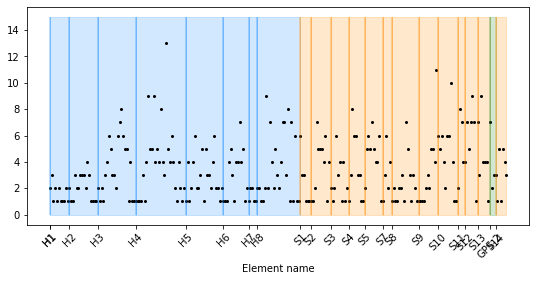

In [13]:
from matplotlib import pyplot as plt
import numpy as np
#print(names)
fig = plt.figure(figsize=[9,4])
fig.set_facecolor("w")
ymax = 15
col_dict = { "H" : "dodgerblue",
             "S" : "darkorange",
             "G" : "forestgreen"}
label_x = [0]
label_txt = ["GPS"]
stored = "H"
stored_x = 0
for lab_idx, label in enumerate(names):
    #print(label.split(".")[0])
    if label.split(".")[0] != stored:
        if label not in ["GPS-1","GPS+1"]:
            box_col = col_dict[stored[0]]
            col = col_dict[label[0]]
            
            plt.vlines(lab_idx, 0,ymax, color=col, alpha=0.4)
            plt.fill_between([stored_x, lab_idx], 0, ymax, color=box_col, alpha=0.2)
            
            stored_x = lab_idx
            stored = label.split(".")[0]
            
            label_x.append(lab_idx)
            label_txt.append(label.split(".")[0])

        
        plt.xticks(ticks = label_x, labels = label_txt, rotation=45)
        #plt.yticks(ticks = [0,1,2], labels = ["0", "100%", "200%"])
        #plt.ylabel("Mutation Number over Position Occurence")
        plt.xlabel("Element name")
plt.fill_between([stored_x, lab_idx], 0, ymax, color="darkorange", alpha=0.2)
#for x in range(len(nums)):
#    alfa = 0.2+(0.8*occus[x]/31)
#    plt.scatter(x, nums[x]/occus[x], color='red', alpha=alfa, s=11)
#plt.plot(range(len(nums)),nums, linewidth=1.5, color='black')
plt.scatter(range(len(nums)),nums, color='black', s=4)
#pt.scatter(range(len(nums)),np.divide(nums, occus), color='red', s=6)
plt.savefig("corr.human_indexed_mutations.png", bbox_inches='tight', dpi=300)

In [14]:
#b-factor : line[60:66]
d1_gain = human_collection.collection[26]
print(d1_gain.name, d1_gain.start, d1_gain.end)
ref_pdb = "d1_gain.pdb"
with open(ref_pdb) as inpdb:
    pdb_data = inpdb.readlines()
#names, nums, occus
print(d1_gain.idx_dir)
new_data = []
for line in pdb_data:
    if not line.startswith("ATOM"):
        new_data.append(line)
        continue
    resid = int(line[22:26])
    try:
        position_label = d1_gain.rev_idx_dir[resid-1] # i.e. "H2.54", account for zero vs. one-indexed!
        try: 
            b = float(len(generalized_mutations[position_label]))
            #print(position_label, len(generalized_mutations[position_label]))
        except KeyError:
            b = 0.0
    except KeyError: 
        b = 0.0
    new_data.append(line[:61]+"%6.2f"%(b)+line[68:])

with open("d1_gain_mut.pdb","w") as outpdb:
    for line in new_data:
        outpdb.write(line)
print("Done.")


Q6QNK2_B2CKK9_B7ZLF7_Q2M1L3_Q6ZMQ1_Q7Z7M2_Q86SM4-AGRD1_HUMAN-AGRD1-Homo_sapiens 235 555
{'H1.47': 236, 'H1.48': 237, 'H1.49': 238, 'H1.50': 239, 'H1.51': 240, 'H1.52': 241, 'H1.53': 242, 'H1.54': 243, 'H1.55': 244, 'H1.56': 245, 'H1.57': 246, 'H4.40': 292, 'H4.41': 293, 'H4.42': 294, 'H4.43': 295, 'H4.44': 296, 'H4.45': 297, 'H4.46': 298, 'H4.47': 299, 'H4.48': 300, 'H4.49': 301, 'H4.50': 302, 'H4.51': 303, 'H4.52': 304, 'H5.39': 313, 'H5.40': 314, 'H5.41': 315, 'H5.42': 316, 'H5.43': 317, 'H5.44': 318, 'H5.45': 319, 'H5.46': 320, 'H5.47': 321, 'H5.48': 322, 'H5.49': 323, 'H5.50': 324, 'H5.51': 325, 'H5.52': 326, 'H5.53': 327, 'H5.54': 328, 'H5.55': 329, 'H5.56': 330, 'H5.57': 331, 'H8.43': 336, 'H8.44': 337, 'H8.45': 338, 'H8.46': 339, 'H8.47': 340, 'H8.48': 341, 'H8.49': 342, 'H8.50': 343, 'H8.51': 344, 'H8.52': 345, 'H8.53': 346, 'H8.54': 347, 'H8.55': 348, 'H8.56': 349, 'H8.57': 350, 'H8.58': 351, 'H8.59': 352, 'H8.60': 353, 'H8.61': 354, 'H8.62': 355, 'H8.63': 356, 'H7.47': 336, '

In [15]:
#b-factor : line[60:66]
for i, gain in enumerate(human_collection.collection):
    if "AGRL1" in gain.name: 
        print(i)
        break
l1_gain = human_collection.collection[i]
print(l1_gain.name, l1_gain.start, l1_gain.end)
ref_pdb = "l1_gain.pdb"
with open(ref_pdb) as inpdb:
    pdb_data = inpdb.readlines()
#names, nums, occus
print(l1_gain.idx_dir)
new_data = []
for line in pdb_data:
    if not line.startswith("ATOM"):
        new_data.append(line)
        continue
    resid = int(line[22:26])
    try:
        position_label = l1_gain.rev_idx_dir[resid-1] # i.e. "H2.54" account for 0-indexed residues in the dictionary!
        try: 
            b = float(len(generalized_mutations[position_label]))
            #print(position_label, len(generalized_mutations[position_label]))
        except KeyError:
            b = 0.0
    except KeyError: 
        b = 0.0
    new_data.append(line[:61]+"%6.2f"%(b)+line[68:])

with open("l1_gain_mut.pdb","w") as outpdb:
    for line in new_data:
        outpdb.write(line)
print("Done.")


7
O94910_Q96IE7_Q9BU07_Q9HAR3-AGRL1_HUMAN-AGRL1-Homo_sapiens 478 798
{'H2.41': 484, 'H2.42': 485, 'H2.43': 486, 'H2.44': 487, 'H2.45': 488, 'H2.46': 489, 'H2.47': 490, 'H2.48': 491, 'H2.49': 492, 'H2.50': 493, 'H2.51': 494, 'H2.52': 495, 'H3.43': 499, 'H3.44': 500, 'H3.45': 501, 'H3.46': 502, 'H3.47': 503, 'H3.48': 504, 'H3.49': 505, 'H3.50': 506, 'H3.51': 507, 'H3.52': 508, 'H3.53': 509, 'H4.40': 516, 'H4.41': 517, 'H4.42': 518, 'H4.43': 519, 'H4.44': 520, 'H4.45': 521, 'H4.46': 522, 'H4.47': 523, 'H4.48': 524, 'H4.49': 525, 'H4.50': 526, 'H4.51': 527, 'H4.52': 528, 'H4.53': 529, 'H4.54': 530, 'H4.55': 531, 'H4.56': 532, 'H4.57': 533, 'H4.58': 534, 'H4.59': 535, 'H4.60': 536, 'H4.61': 537, 'H4.62': 538, 'H4.63': 539, 'H5.28': 548, 'H5.29': 549, 'H5.30': 550, 'H5.31': 551, 'H5.32': 552, 'H5.33': 553, 'H5.34': 554, 'H5.35': 555, 'H5.36': 556, 'H5.37': 557, 'H5.38': 558, 'H5.39': 559, 'H5.40': 560, 'H5.41': 561, 'H5.42': 562, 'H5.43': 563, 'H5.44': 564, 'H5.45': 565, 'H5.46': 566, 'H5.47

In [16]:
label = "H4.51"
#print(generalized_mutations[label])
def position_mutation(label, text_out=None):
    # Prints or writes to File the mutations at a specific label position.
    def tee(file_obj=None, text_string=""):
        # Selector function similar to UNIX "tee" -> where it prints and - if existing - writes to File.
        if file_obj is not None:
            file_obj.write(text_string)
        print(text_string, end='')

    if text_out is not None: # Initialize TEXT output file if specified. Otherwise construct None
        text = open(text_out, 'w')
    else: text = None

    tee(text, f"CANCER GENOME ATLAS MUTATIONS AT POSITION {label.upper()} \nTOTAL: {len(generalized_mutations[label])} MUTATIONS\n\n")

    for mutation in generalized_mutations[label]:
        for key in mutation.keys():
            tee(text, f"{key.ljust(30)} {mutation[key]}\n")
        resid = int(mutation["x"]) # X is the residue ID
        tee(text, "\n"+"_"*30+"\n")

position_mutation(label, text_out=f"{label}.out")

CANCER GENOME ATLAS MUTATIONS AT POSITION H4.51 
TOTAL: 13 MUTATIONS

id                             c6e88253-f013-5cad-a793-e8e9268bc53d
y                              1
genomic_dna_change             chr3:g.48648793C>A
x                              2235
consequence                    missense
impact                         MODERATE
sift_impact                    tolerated
polyphen_impact                benign
sift_score                     0.82
polyphen_score                 0.028
aa_change                      A2235S
receptor                       Q9NYQ7_O75092-CELR3_HUMAN-CadherinEGFLAGseven-passG-typereceptor3-Homo_sapiens

______________________________
id                             0567926b-9f45-52d2-9faf-dc903ecb387d
y                              2
genomic_dna_change             chr6:g.68993904G>T
x                              624
consequence                    missense
impact                         MODERATE
sift_impact                    deleterious
polyphen_impact       

In [17]:
def query_criteria(*pairs, sift=None, poly=None, mutation_dict):
    # Defines a function where key - value pairs will be used to specifically filter criteria to be applied for subselection of mutations.
    #       i.e. ("consequence", "missense"), ("sift_impact","deleterious")
    # Scores "sift" and "polyphen" define minimum and maximum values with an operator to determine lower than or higher than $val cutoffs
    #       i.e. ("sift_score", ">", 0.22) as tuples
    print("DEBUG:", pairs)
    def eval_entry(pairs, entry):
        if pairs is None:
            return True

        for tup in pairs:
            if entry[tup[0]] != tup[1]:
                return False
        return True

    # Set a custom_func flag indicating if there are custom dependent lambda functions for scores specified
    custom_func = True
    if sift is None and poly is None:
        custom_func = False
    if sift is None:
        sift = lambda n: True
    if poly is None:
        poly = lambda n: True

        
    print("DEBUG", custom_func)

    valid_ct = 0
    out_dict = {}
    # We want to filter the generalized dictionary by key
    for ki in mutation_dict.keys():
        mutation_list = mutation_dict[ki]
        filtered_mutation_list = []
        for mutation in mutation_list:
            # Check the scores first. If there are no scores, but custom functions specified, thats ok. Otherwise, do not consider this entry
            try: 
                s = float(mutation["sift_score"])
                p = float(mutation["polyphen_score"])
            except:
                #print("Scores not in Entry...", end ='')
                if custom_func == True:
                    continue
                print("But no score functions specified")
            if custom_func and not sift(float(mutation["sift_score"])):
                continue
            if custom_func and not poly(float(mutation["polyphen_score"])):
                continue
            # Here, check the *pairs argument if that matches the specifications.
            if not eval_entry(pairs, mutation):
                continue
            
            valid_ct += 1
            filtered_mutation_list.append(mutation)
        out_dict[ki] = filtered_mutation_list
    print(f"Found {valid_ct} entries matching criteria.")
    return out_dict
            

# Example Lambda Functions for score evaluation
poly = lambda n : n > 0.446 # > 0.446 for possibly damaging, > 0.908 for Probably Damaging
sift = lambda n : n < 0.05 # For deleterious impacts

In [18]:
#missense_dict = query_criteria(("consequence", "missense"), poly=lambda n : n > 0.446, mutation_dict=generalized_mutations)
missense_dict2 = query_criteria(mutation_dict=generalized_mutations)

DEBUG: ()
DEBUG False
But no score functions specified
But no score functions specified
But no score functions specified
But no score functions specified
But no score functions specified
But no score functions specified
But no score functions specified
But no score functions specified
But no score functions specified
But no score functions specified
But no score functions specified
But no score functions specified
But no score functions specified
But no score functions specified
But no score functions specified
But no score functions specified
But no score functions specified
But no score functions specified
But no score functions specified
But no score functions specified
But no score functions specified
But no score functions specified
But no score functions specified
But no score functions specified
But no score functions specified
But no score functions specified
But no score functions specified
But no score functions specified
But no score functions specified
But no score function

In [19]:
for gain in human_collection.collection:
    if "AGRL3" in gain.name:
        print("DEBUG:", gain.name, gain.idx_dir, "".join(gain.sequence))

DEBUG: Q9HAR2_E9PE04_O94867_Q9NWK5-AGRL3_HUMAN-AGRL3-Homo_sapiens {'H2.41': 499, 'H2.42': 500, 'H2.43': 501, 'H2.44': 502, 'H2.45': 503, 'H2.46': 504, 'H2.47': 505, 'H2.48': 506, 'H2.49': 507, 'H2.50': 508, 'H2.51': 509, 'H2.52': 510, 'H3.43': 514, 'H3.44': 515, 'H3.45': 516, 'H3.46': 517, 'H3.47': 518, 'H3.48': 519, 'H3.49': 520, 'H3.50': 521, 'H3.51': 522, 'H3.52': 523, 'H3.53': 524, 'H3.54': 525, 'H4.40': 531, 'H4.41': 532, 'H4.42': 533, 'H4.43': 534, 'H4.44': 535, 'H4.45': 536, 'H4.46': 537, 'H4.47': 538, 'H4.48': 539, 'H4.49': 540, 'H4.50': 541, 'H4.51': 542, 'H4.52': 543, 'H4.53': 544, 'H4.54': 545, 'H4.55': 546, 'H4.56': 547, 'H4.57': 548, 'H4.58': 549, 'H4.59': 550, 'H4.60': 551, 'H4.61': 552, 'H4.62': 553, 'H5.35': 557, 'H5.36': 558, 'H5.37': 559, 'H5.38': 560, 'H5.39': 561, 'H5.40': 562, 'H5.41': 563, 'H5.42': 564, 'H5.43': 565, 'H5.44': 566, 'H5.45': 567, 'H5.46': 568, 'H5.47': 569, 'H5.48': 570, 'H5.49': 571, 'H5.50': 572, 'H5.51': 573, 'H5.52': 574, 'H5.53': 575, 'H5.54': 